In [74]:
using Revise
using MGVInference

In [2]:
polyfit_model = "../test/test_models/polyfit.jl"
open(polyfit_model, "r") do io
    map(println, readlines(io))
end
include(polyfit_model)

# This file is a part of MGVInference.jl, licensed under the MIT License (MIT).

using Distributions
using Random
using ValueShapes

_x1_grid = [Float64(i)/10 for i in 1:25]
_x2_grid = [Float64(i)/10 + 0.1 for i in 1:15]
_common_grid = sort(vcat(_x1_grid, _x2_grid))

function _mean(x_grid, p)
    p[1]*10 .+ p[2]*40 .* x_grid .+ p[3]*600 .* x_grid.^2 .+ p[4]*80 .* x_grid.^3
end

function model(p)
    dist1 = Product(Normal.(_mean(_x1_grid, p), p[5]^2*60))
    dist2 = Product(Normal.(_mean(_x2_grid, p), p[5]^2*60))
    NamedTupleDist(a=dist1,
                   b=dist2)
end

true_params =  [
 -0.3
 -1.5
 0.2
 -0.5
 0.3]

starting_point = [
  0.2
  0.5
  -0.1
  0.3
 -0.6
]

export model, true_params, starting_point


In [75]:
using Distributions
using Random
using ValueShapes
using LinearAlgebra
using Optim
using Plots

In [4]:
data = rand(model(true_params), 1)[1];

In [5]:
function _mean(x::Vector)
    _mean(_common_grid, x)
end

_mean (generic function with 2 methods)

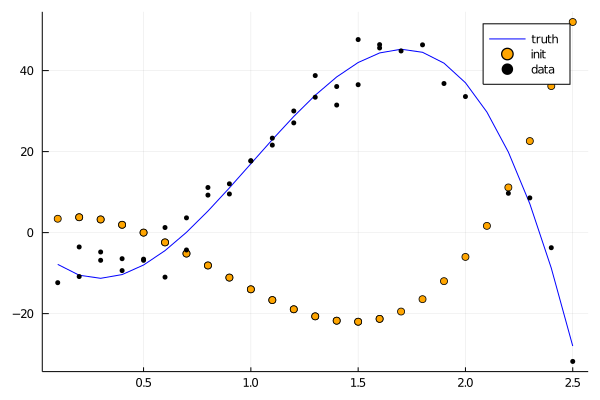

In [6]:
init_plots =() -> let
    truth = _mean(true_params)
    plot!(_common_grid, truth, markercolor=:blue, linecolor=:blue, label="truth")
    scatter!(_common_grid, _mean(starting_point), markercolor=:orange, label="init")
    scatter!(vcat(_x1_grid, _x2_grid), MGVInference.unshaped(data), markercolor=:black, markersize=3, label="data")
end
plot()
init_plots()

In [45]:
first_iteration = mgvi_kl_optimize_step(model, data, starting_point;
                                        jacobian_func=FwdRevADJacobianFunc,
                                        residual_sampler=ImplicitResidualSampler)

display(hcat(first_iteration.result, true_params))

5×2 Array{Float64,2}:
 -1.41752   -0.3
 -0.618533  -1.5
  0.157712   0.2
 -0.434462  -0.5
 -1.27507    0.3

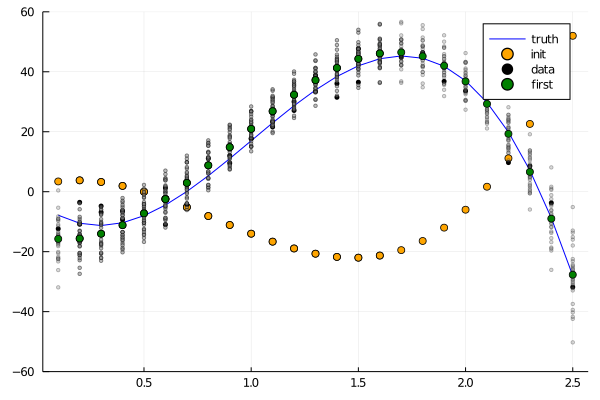

In [58]:
plot_iteration = (params, label) -> let
    #error_mat = mgvi_kl_errors(full_model, params)
    #display(error_mat)
    #errors = sqrt.(error_mat[diagind(error_mat)])
    #yerr = abs.(line(common_grid, params+errors) - line(common_grid, params-errors))
    #scatter!(common_grid, line(common_grid, params), markercolor=:green, label=label, yerr=yerr)
    for sample in eachcol(params.samples)
        scatter!(_common_grid, _mean(Vector(sample)), markercolor=:gray, markeralpha=0.3, markersize=2, label=nothing)
    end
    scatter!(_common_grid, _mean(params.result), markercolor=:green, label=label)
end
    
plot(ylims=(-60,60))
init_plots()
plot_iteration(first_iteration, "first")

In [55]:
plot_iteration_light = (params, counter) -> let
    scatter!(_common_grid, _mean(params.result), markercolor=:green, markersize=3, markeralpha=2*atan(counter/18)/π, label=nothing)
end

#47 (generic function with 1 method)

214.40766879883557

5×2 Array{Float64,2}:
 -1.41752   -0.3
 -0.618533  -1.5
  0.157712   0.2
 -0.434462  -0.5
 -1.27507    0.3

228.72329299573042

5×2 Array{Float64,2}:
 -0.816204  -0.3
 -1.3207    -1.5
  0.140008   0.2
 -0.290098  -0.5
 -1.07614    0.3

528.1345115862057

5×2 Array{Float64,2}:
 -0.71004   -0.3
 -1.76937   -1.5
  0.247869   0.2
 -0.638824  -0.5
 -1.07069    0.3

1.7717499420629984e6

5×2 Array{Float64,2}:
  1.56587     -0.3
 -0.147681    -1.5
  0.0861243    0.2
 -0.279807    -0.5
  0.00655416   0.3

114.24749443331139

5×2 Array{Float64,2}:
 -0.224384  -0.3
 -1.37064   -1.5
  0.188503   0.2
 -0.476116  -0.5
  0.261092   0.3

2818.346552489996

5×2 Array{Float64,2}:
 -0.134578  -0.3
 -1.49074   -1.5
  0.195822   0.2
 -0.490831  -0.5
  0.237403   0.3

132.61719034733463

5×2 Array{Float64,2}:
 -0.233163  -0.3
 -1.31182   -1.5
  0.184712   0.2
 -0.46948   -0.5
 -0.371802   0.3

277.2048276880974

5×2 Array{Float64,2}:
 -0.157068    -0.3
 -1.4339      -1.5
  0.192281     0.2
 -0.483162    -0.5
 -2.38943e-5   0.3

114.2474935574214

5×2 Array{Float64,2}:
 -0.224384  -0.3
 -1.37064   -1.5
  0.188503   0.2
 -0.476116  -0.5
 -0.261092   0.3

137.58188965491115

5×2 Array{Float64,2}:
 -0.324312  -0.3
 -1.25914   -1.5
  0.180904   0.2
 -0.45953   -0.5
  0.404998   0.3

1161.5663455955096

5×2 Array{Float64,2}:
  0.358997  -0.3
 -1.8631    -1.5
  0.210435   0.2
 -0.509205  -0.5
  0.401096   0.3

223.1219610550741

5×2 Array{Float64,2}:
 -0.261071  -0.3
 -1.1563    -1.5
  0.177561   0.2
 -0.464212  -0.5
  1.34948    0.3

223.44826843694102

5×2 Array{Float64,2}:
 -0.292108  -0.3
 -0.571886  -1.5
  0.167843   0.2
 -0.46705   -0.5
  1.24849    0.3

234.27041668263104

5×2 Array{Float64,2}:
 -0.666395  -0.3
 -0.842497  -1.5
  0.20086    0.2
 -0.571579  -0.5
  1.50441    0.3

248.99192060170944

5×2 Array{Float64,2}:
 -0.541598  -0.3
 -0.94241   -1.5
  0.278253   0.2
 -0.897828  -0.5
 -1.68513    0.3

240.9475313935486

5×2 Array{Float64,2}:
 -0.622016   -0.3
 -0.630473   -1.5
  0.0811766   0.2
 -0.159653   -0.5
 -1.63424     0.3

284.4040660476124

5×2 Array{Float64,2}:
 -0.281785  -0.3
 -1.41064   -1.5
  0.221727   0.2
 -0.530132  -0.5
  2.81942    0.3

249.6145679243032

5×2 Array{Float64,2}:
 -0.215603  -0.3
 -0.243118  -1.5
  0.108374   0.2
 -0.380305  -0.5
  1.27646    0.3

230.02805885370944

5×2 Array{Float64,2}:
 -0.405159  -0.3
 -0.833744  -1.5
  0.14184    0.2
 -0.337593  -0.5
  1.2037     0.3

451.7965031103902

5×2 Array{Float64,2}:
 -0.246144     -0.3
 -1.34398      -1.5
  0.186715      0.2
 -0.472737     -0.5
  0.000362442   0.3

114.24749355742772

5×2 Array{Float64,2}:
 -0.224384  -0.3
 -1.37064   -1.5
  0.188503   0.2
 -0.476116  -0.5
 -0.261092   0.3

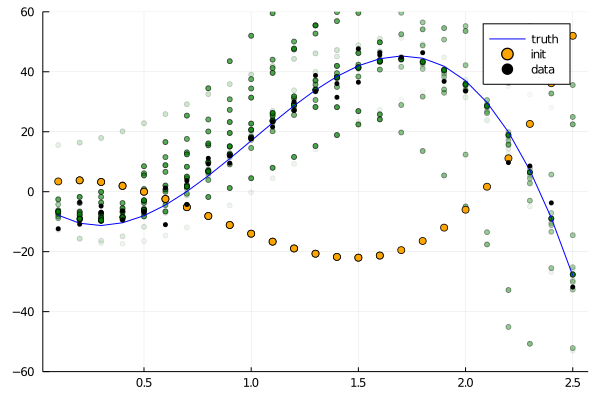

In [78]:
plt = scatter(ylims=(-60,60))
next_iteration = first_iteration
for i in 1:20
    display(minimum(next_iteration.optimized))
    display(hcat(next_iteration.result, true_params))
    next_iteration = mgvi_kl_optimize_step(model, data, next_iteration.result;
                                           jacobian_func=FwdRevADJacobianFunc,
                                           residual_sampler=ImplicitResidualSampler,
                                           optim_options=Optim.Options(g_abstol=0.1, g_reltol=1E-2))
    plot_iteration_light(next_iteration, i)
end
display(minimum(next_iteration.optimized))
display(hcat(next_iteration.result, true_params))

init_plots()
display(plt)

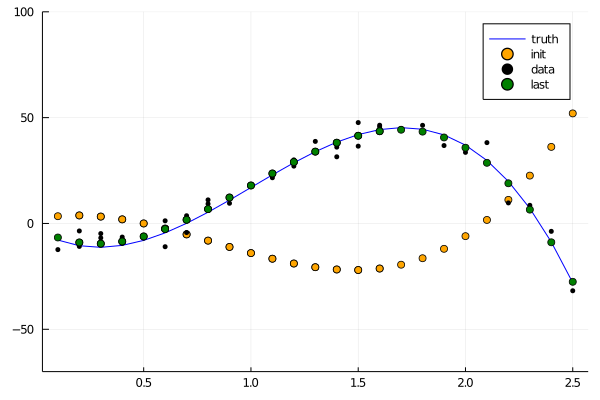

In [79]:
plot(ylims=(-70,100))
init_plots()
plot_iteration(next_iteration, "last")